## Comparison between K-Means and K-Medoids

K-Means and K-Medoids are both popular clustering algorithms used in data analysis for grouping data into
$k$ clusters, where $k$ is predefined by the analyst. While both aim to minimize the distance between points in a cluster and a central point, they differ significantly in their approach and the type of distance methods they typically use.

### K-Means Clustering

**Description:**

  * K-Means attempts to partition the dataset into $𝐾$ predefined distinct non-overlapping clusters where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far apart) as possible.
  * It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is minimized. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

**Distance Method:**

  * The standard K-Means algorithm uses the Euclidean distance measure to assess distance between data points and the cluster centroid. The use of squared Euclidean distance allows the algorithm to compute the variance of the cluster as a measure of cluster quality (though variations exist that can use other distance measures).

**Pros:**

  * Efficient in terms of computational cost

**Cons:**

  * Assumes the clusters are spherical and evenly sized, something that might not always be the case with real-world data.
Sensitivity to outliers since a mean can be influenced by extreme values.
  * The random initialization stage can lead to poor convergence, which is why multiple runs with different initial centroids are necessary to choose the best one.

### K-Medoids Clustering

**Description:**

  * K-Medoids is similar to K-Means in trying to minimize the distance between points assigned to each cluster; however, unlike K-Means, which calculates the mean of the points in the cluster to define the cluster center (centroid), K-Medoids uses one of the actual points in the cluster as the center (medoid).
  * A medoid can be defined as the object of a cluster, whose average dissimilarity to all the objects in the cluster is minimal, i.e., it is the most centrally located point in the cluster.

**Distance Method:**

  * K-Medoids is more flexible compared to K-Means in terms of the distance metrics used, as it can effectively work with any distance metric. Common choices include Manhattan, Euclidean, cosine similarity, and more. This makes K-Medoids particularly useful for clustering non-numeric data where binary distance measures are required.

**Pros:**

  * Robust to noise and outliers as medoids are less influenced by outliers or other extreme values than means.
  * Applicable for a variety of distance metrics.

**Cons:**

  * More computationally expensive than K-Means, particularly with large numbers of clusters and data points, because it requires computation of all pairwise distances between points when reassigning points to clusters and when updating the medoid of a cluster.

### Example

This code illustrates K-Mediods clustering using two differet distance metreics (Euclidean metrircs and Manhattan metrics)

To read more about PyClustering

https://pyclustering.github.io/docs/0.9.0/html/dc/d6b/classpyclustering_1_1cluster_1_1cluster__visualizer__multidim.html#details


In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=be36fa428b500174f4d2cc3a9910a4e3b18d15063bd91e3af00f00df6c8b8231
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
import numpy as np
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample
from pyclustering.utils.metric import type_metric, distance_metric
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
data = iris.data

In [ ]:
# Define initial medoids (using indices of the data array)
initial_medoids = [3, 50, 100]

# Define the distance metric (Euclidean)
euclidean_metric = distance_metric(type_metric.EUCLIDEAN)

# Define the distance metric (Manhattan)
manhattan_metric = distance_metric(type_metric.MANHATTAN)


In [ ]:
# Create K-Medoids algorithm with the Euclidean distance metric
kmedoids_instance_euclidean = kmedoids(data, initial_medoids, metric=euclidean_metric)

# Run cluster analysis and obtain results
kmedoids_instance_euclidean.process()
clusters_euclidean = kmedoids_instance_euclidean.get_clusters()
medoids_euclidean = kmedoids_instance_euclidean.get_medoids()

# Create K-Medoids algorithm with the Manhattan distance metric
kmedoids_instance_manhattan = kmedoids(data, initial_medoids, metric=manhattan_metric)

# Run cluster analysis and obtain results
kmedoids_instance_manhattan.process()
clusters_manhattan = kmedoids_instance_manhattan.get_clusters()
medoids_manhattan = kmedoids_instance_manhattan.get_medoids()


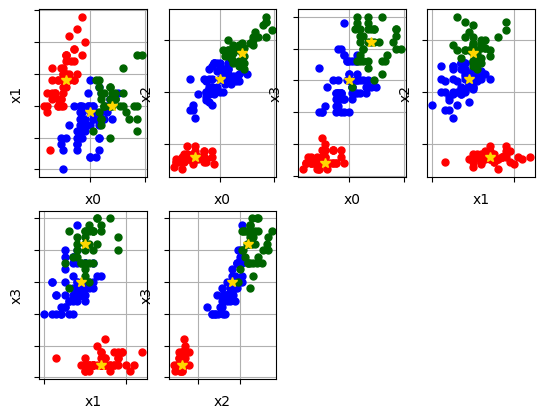

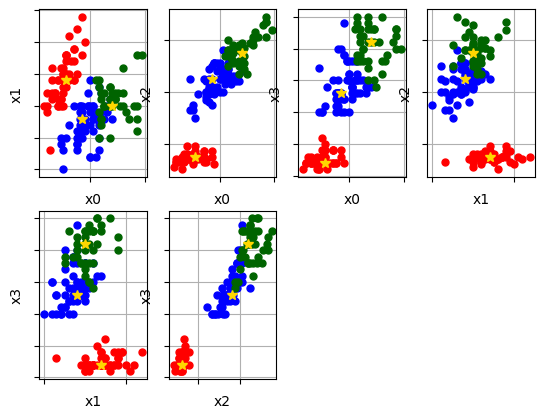

In [ ]:
# Visualize the clusters using cluster_visualizer_multidim for multi-dimensional data
visualizer1 = cluster_visualizer_multidim()
# The cluster_visualizer_multidim expects a list of lists of data points or indices.
# The clusters obtained from kmedoids are lists of indices.
# We need to convert the list of indices to a list of list of data points.

# Convert cluster indices to data points for Euclidean clusters
clusters_data_euclidean = [[data[i] for i in cluster] for cluster in clusters_euclidean]

# Append clusters with the actual data points
visualizer1.append_clusters(clusters_data_euclidean, marker='o', markersize=5)
visualizer1.append_cluster([data[i] for i in medoids_euclidean], marker='*', markersize=7)

visualizer1.show()

visualizer2 = cluster_visualizer_multidim() # Use cluster_visualizer_multidim for multi-dimensional data

# Convert cluster indices to data points for Manhattan clusters
clusters_data_manhattan = [[data[i] for i in cluster] for cluster in clusters_manhattan]

# Append clusters with the actual data points
visualizer2.append_clusters(clusters_data_manhattan, marker='o', markersize=5)
visualizer2.append_cluster([data[i] for i in medoids_manhattan], marker='*', markersize=7)

visualizer2.show()